In [1]:
import glob
import torch
from torch.utils import data
from PIL import Image
import numpy as np
from torchvision import transforms
import torchvision
import matplotlib.pyplot as plt

### Data Cleaning
The first step is to deal all the data to the format of "tensor" which is acceptable by the torch
And then using method glob to access all the photos in the image folder.

In [2]:
all_imgs_path = glob.glob(r'./image_data/*/*.png')
print(all_imgs_path[:100])
print("Numbers of All Samples: ",len(all_imgs_path))
#Print out every element in the loop, just change the variable false to true
if False:
  for var in all_imgs_path:
      print(var)

['./image_data/donut_images/donut695.png', './image_data/donut_images/donut681.png', './image_data/donut_images/donut118.png', './image_data/donut_images/donut130.png', './image_data/donut_images/donut642.png', './image_data/donut_images/donut497.png', './image_data/donut_images/donut483.png', './image_data/donut_images/donut468.png', './image_data/donut_images/donut454.png', './image_data/donut_images/donut332.png', './image_data/donut_images/donut326.png', './image_data/donut_images/donut440.png', './image_data/donut_images/donut285.png', './image_data/donut_images/donut291.png', './image_data/donut_images/donut508.png', './image_data/donut_images/donut520.png', './image_data/donut_images/donut246.png', './image_data/donut_images/donut252.png', './image_data/donut_images/donut534.png', './image_data/donut_images/donut36.png', './image_data/donut_images/donut22.png', './image_data/donut_images/donut722.png', './image_data/donut_images/donut736.png', './image_data/donut_images/donut737

### Set label for images
Set images label and categroy, construct a dictionary that contains the corresponding key to value about the label of the image.

In [3]:
species = ['bagel','donut']
species_to_id = dict((c, i) for i, c in enumerate(species))
id_to_species = dict((v, k) for k, v in species_to_id.items())
print(id_to_species)
all_labels = []
#iter through the path of the image
for img in all_imgs_path:
    # Classify each img should be on which label
    for i, c in enumerate(species):
        if c in img:
            all_labels.append(i)
print(all_labels[:100]) #Get All labels

{0: 'bagel', 1: 'donut'}
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### Transpose the data
Making all the photos the same size: "96 * 96"
and then making sure they are all between the tensor[-1,1]

In [4]:
transform = transforms.Compose([
                transforms.Resize((96,96)), 
                transforms.ToTensor(), 
                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

### Define dataset class
load the data according to the batchsize, and then create the object called foot_dataset.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([10, 3, 96, 96])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


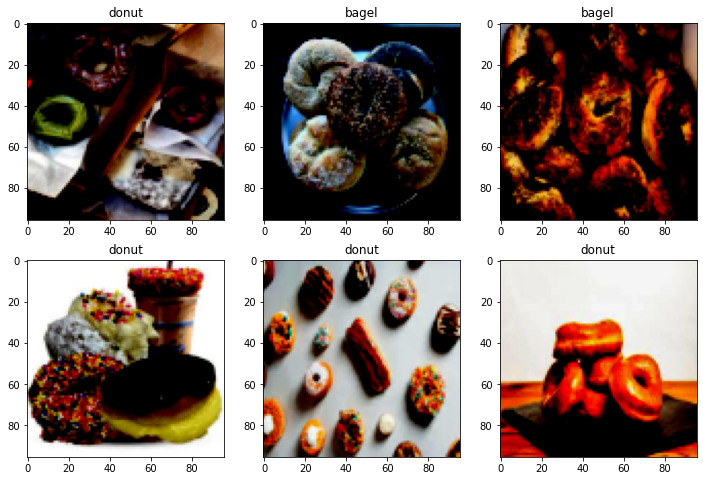

In [5]:
class Mydatasetpro(data.Dataset):
    def __init__(self, img_paths, labels, transform):
        self.imgs = img_paths
        self.labels = labels
        self.transforms = transform
    def __getitem__(self, index):               
        img = self.imgs[index]                  #Slice the data according to the index, and then return the data -> to tensor
        label = self.labels[index]
        pil_img = Image.open(img).convert('RGB')             
        data = self.transforms(pil_img)
        return data, label
    def __len__(self):
        return len(self.imgs)

BATCH_SIZE = 10
food_dataset = Mydatasetpro(all_imgs_path, all_labels, transform)
food_datalodaer = data.DataLoader(
                            food_dataset,
                            batch_size=BATCH_SIZE,
                            shuffle=True
)
#Visulize the data
imgs_batch, labels_batch = next(iter(food_datalodaer))
print(imgs_batch.shape)

plt.figure(figsize=(12, 8))
for i, (img, label) in enumerate(zip(imgs_batch[:6], labels_batch[:6])):
    img = img.permute(1, 2, 0).numpy()
    plt.subplot(2, 3, i+1)
    plt.title(id_to_species.get(label.item()))
    plt.imshow(img)
plt.show()

### Split Train Set and Test Set
80% Training and 20% Testing

In [6]:
index = np.random.permutation(len(all_imgs_path))

all_imgs_path = np.array(all_imgs_path)[index]
all_labels = np.array(all_labels)[index]
print("Total Number of Samples: ",len(all_imgs_path))
#80% as train
s = int(len(all_imgs_path)*0.8)
print("Numbers of Pic for the Training Set: ",s)

train_imgs = all_imgs_path[:s]
train_labels = all_labels[:s]
test_imgs = all_imgs_path[s:]
test_labels = all_labels[s:]

trainset = Mydatasetpro(train_imgs, train_labels, transform) #TrainSet TensorData
testset = Mydatasetpro(test_imgs, test_labels, transform) #TestSet TensorData
trainloader = data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)#TrainSet Labels
testloader = data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True)#TestSet Labels

Total Number of Samples:  1511
Numbers of Pic for the Training Set:  1208


### Define a Conv Neural Network

In [7]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 21 * 21, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # print(x.shape)
        x = x.view(-1, 16 * 21 * 21)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = Net().to(device)

### Define a loss function and an optimizer.

In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

### Start Training, epoch = 5, print out the loss value

In [9]:
for epoch in range(5):  # loop over the dataset multiple times
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        print(loss)
print('Finished Training')

tensor(0.7036, grad_fn=<NllLossBackward0>)
tensor(0.6810, grad_fn=<NllLossBackward0>)
tensor(0.7462, grad_fn=<NllLossBackward0>)
tensor(0.6716, grad_fn=<NllLossBackward0>)
tensor(0.7341, grad_fn=<NllLossBackward0>)
tensor(0.6851, grad_fn=<NllLossBackward0>)
tensor(0.6709, grad_fn=<NllLossBackward0>)
tensor(0.7888, grad_fn=<NllLossBackward0>)
tensor(0.6405, grad_fn=<NllLossBackward0>)
tensor(0.6794, grad_fn=<NllLossBackward0>)
tensor(0.7230, grad_fn=<NllLossBackward0>)
tensor(0.6872, grad_fn=<NllLossBackward0>)


/Users/apple/miniforge3/envs/pyc/lib/python3.9/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


tensor(0.6123, grad_fn=<NllLossBackward0>)
tensor(0.6997, grad_fn=<NllLossBackward0>)
tensor(0.6921, grad_fn=<NllLossBackward0>)
tensor(0.7040, grad_fn=<NllLossBackward0>)
tensor(0.7131, grad_fn=<NllLossBackward0>)
tensor(0.6620, grad_fn=<NllLossBackward0>)
tensor(0.6469, grad_fn=<NllLossBackward0>)
tensor(0.6761, grad_fn=<NllLossBackward0>)
tensor(0.6592, grad_fn=<NllLossBackward0>)
tensor(0.6491, grad_fn=<NllLossBackward0>)
tensor(0.6864, grad_fn=<NllLossBackward0>)
tensor(0.5965, grad_fn=<NllLossBackward0>)
tensor(0.7468, grad_fn=<NllLossBackward0>)
tensor(0.7878, grad_fn=<NllLossBackward0>)
tensor(0.7274, grad_fn=<NllLossBackward0>)
tensor(0.7554, grad_fn=<NllLossBackward0>)
tensor(0.6462, grad_fn=<NllLossBackward0>)
tensor(0.7147, grad_fn=<NllLossBackward0>)
tensor(0.6885, grad_fn=<NllLossBackward0>)
tensor(0.7125, grad_fn=<NllLossBackward0>)
tensor(0.6567, grad_fn=<NllLossBackward0>)
tensor(0.6877, grad_fn=<NllLossBackward0>)
tensor(0.7071, grad_fn=<NllLossBackward0>)
tensor(0.67

### Test the accuracy on the test dataset.

In [10]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 68 %


### More visualized show of the result

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([10, 3, 96, 96])
tensor([0])


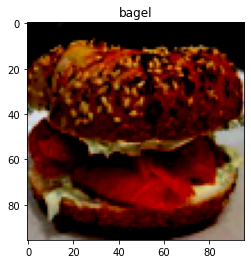

In [11]:
#show result
import random
imgs_batch, labels_batch = next(iter(testloader))
print(imgs_batch.shape)
index0 = random.randint(0,31)
img,label = imgs_batch[0], labels_batch[0]
outputs = net(img)
_, predicted = torch.max(outputs.data, 1)
print(predicted)
img = img.permute(1, 2, 0).numpy()
# plt.subplot(2, 3)
plt.title(id_to_species.get(label.item()))
plt.imshow(img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([10, 3, 96, 96])
Donut Donut 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Donut Donut Bagel Donut 

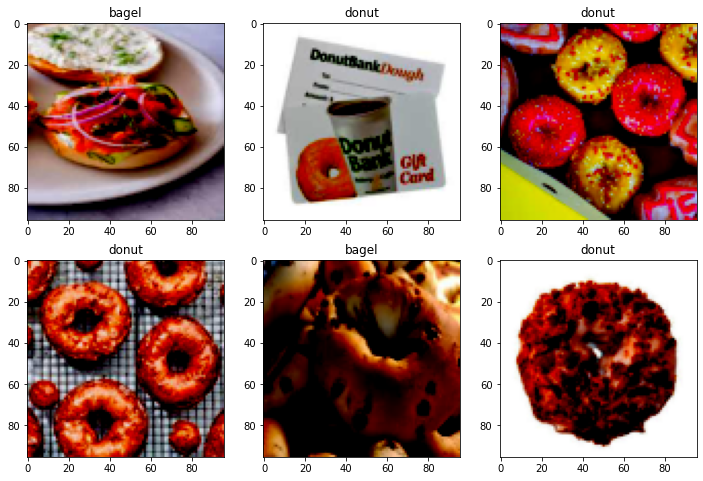

In [12]:
imgs_batch, labels_batch = next(iter(testloader))
print(imgs_batch.shape)

plt.figure(figsize=(12, 8))
for i, (img, label) in enumerate(zip(imgs_batch[:6], labels_batch[:6])):
    outputs = net(img)
    _, predicted = torch.max(outputs.data, 1)
    if predicted.item() == 0:
        print("Bagel", end=" ")
    else:
        print("Donut", end=" ")
    img = img.permute(1, 2, 0).numpy()
    plt.subplot(2, 3, i+1)
    plt.title(id_to_species.get(label.item()))
    plt.imshow(img)
plt.show()

### Reflection

有以下几种方法可以提高这个卷积神经网络的性能：

Increasing the number of convolutional layers and pooling layers can enhance the model's abstraction and expression ability, as well as reduce the size of the feature map and computational complexity. However, adding more layers also increases the risk of overfitting, so appropriate regularization techniques such as dropout and weight decay should be applied.

Using pre-trained models: Pre-trained models trained on large-scale datasets, such as ResNet and Inception, can be used. Fine-tuning these models can achieve better performance on small datasets.

Data augmentation: Applying various data transformations, such as random cropping, flipping, and color transformations, can increase the diversity and quantity of data and improve the model's generalization ability.

Tuning hyperparameters: Different hyperparameters such as learning rate, optimizer, regularization coefficient, etc. can be tried to find the optimal hyperparameter combination.

Using ensemble learning: Using multiple models for ensemble learning, such as bagging, boosting, etc., can improve the model's robustness and generalization ability.

Note that different tasks and datasets may require different optimization strategies and network structures, and should be selected and adjusted accordingly.